In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def randomSample(r,c,n):
    totalPoints = len(r)
    idx = np.random.permutation(np.arange(totalPoints))
    idx = idx[:n]
    r2, c2 = [], []
    for i in range(len(idx)):
        r2.append(r[idx[i]])
        c2.append(c[idx[i]])
    return r2, c2

In [3]:
r = np.arange(10)
c = np.arange(10)[::-1]
r2, c2 = randomSample(r,c,2)
print(r2, c2)

[4, 0] [5, 9]


In [4]:
def fitLine(r1, c1, r2, c2):
    p = np.array([1,1])
    A = np.array([[r1, 1], [r2, 1]])
    q = np.array([[c1], [c2]])
    if np.linalg.matrix_rank(A) == 2:
        p = np.linalg.inv(A).dot(q)
    a,b = p[0], p[1]
    return a,b

In [5]:
r = np.arange(10)
c = np.arange(10)[::-1]
r2, c2 = randomSample(r,c,2)
a,b = fitLine(r2[0], c2[0], r2[1], c2[1])
print(a, b)

[-1.] [9.]


In [6]:
def getConsistencyScore(r, c, th, a,b):
    score = 0
    for i in range(len(r)):
        squaredError = (a*r[i]+b - c[i])**2
        if squaredError < th:
            score += 1
    return score

In [7]:
def RANSACLine(E):
    E = E > 0
    idx = np.argwhere(E)
    r, c = idx[:,0], idx[:,1]
    best_a, best_b = 0, 0
    maxScore = -1
    numIter = 10
    for iter in range(numIter):
        r2, c2 = randomSample(r,c,2)
        a, b = fitLine(r2[0], c2[0], r2[1], c2[1])
        score = getConsistencyScore(r,c,2, a,b)
        if score > maxScore:
            maxScore = score
            best_a, best_b = a,b
    return best_a, best_b

In [8]:
E = plt.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 9\E.png')

In [9]:
E = E[:,:,0]

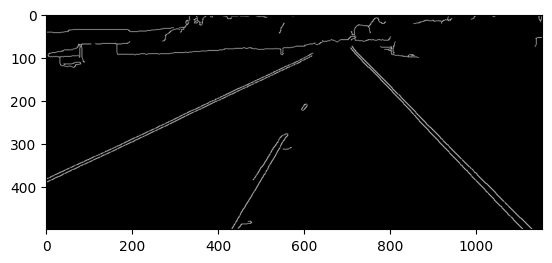

In [10]:
plt.imshow(E, cmap='gray')

In [11]:
E.max(), E.min()

(1.0, 0.0)

In [12]:
best_a, best_b = RANSACLine(E)
best_a, best_b

(array([0.95665635]), array([630.46439628]))

In [13]:
def getExtents(a,b, numRows, numCols):
    r1 = int(0)
    c1 = int(a*r1+b)
    r2 = int(numRows -1)
    c2 = int(a*r2+b)
    return (c1, r1), (c2, r2)

In [14]:
s, e = getExtents(best_a, best_b, E.shape[0], E.shape[1])

C:\Users\Sandro\AppData\Local\Temp\ipykernel_26776\3689441411.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c1 = int(a*r1+b)
C:\Users\Sandro\AppData\Local\Temp\ipykernel_26776\3689441411.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c2 = int(a*r2+b)


In [15]:
s,e

((630, 0), (1106, 498))

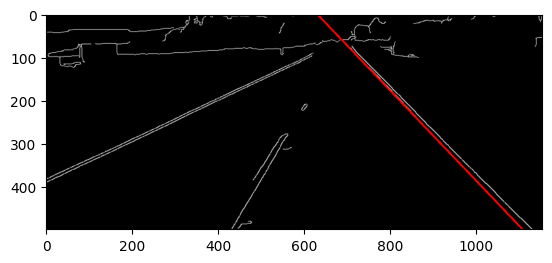

In [16]:
E2 = np.zeros((E.shape[0], E.shape[1], 3), dtype=np.uint8)
E3 = np.array(E*255, np.uint8)

E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2, s, e, (0,0,255), 3)
plt.imshow(I[:,:,::-1])

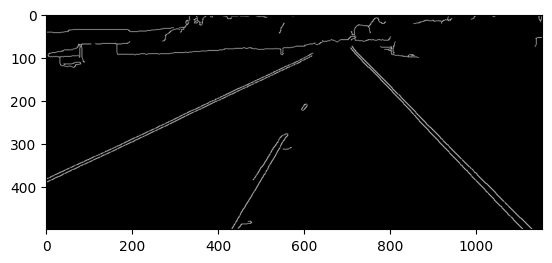

In [17]:
plt.imshow(E3, cmap="gray")

# RANSAC Circle
Don't woory about the fitCircle implementation. Take it as a black box

In [18]:
def fitCircle(x1,y1,x2,y2,x3,y3):
    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    return px,py,r


In [33]:
def getConsistencyScore_circle(r,c,th,cr,cc,d):
    score = 0
    for i in range(len(r)):
        sd = ((r[i] -cr)**2 + (c[i]-cc)**2 - d**2)**2
        if sd < th:
            score += 1
    return score

In [31]:
def RANSACCircle(E):
    E = E > 0
    idx = np.argwhere(E)
    r, c = idx[:,0], idx[:,1]
    best_cr, best_cc, best_d = 0, 0, 0
    maxScore = -1
    numIter = 1000
    for iter in range(numIter):
        r2, c2 = randomSample(r,c,3)
        cr, cc, d = fitCircle(r2[0], c2[0], r2[1], c2[1], r2[2], c2[2])
        score = getConsistencyScore_circle(r,c,3,cr,cc,d)
        if score > maxScore:
            maxScore = score
            best_cr , best_cc , best_d = cr , cc , d
    return best_cr, best_cc, best_d

In [21]:
E = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 9\Ec.png', cv2.IMREAD_GRAYSCALE)

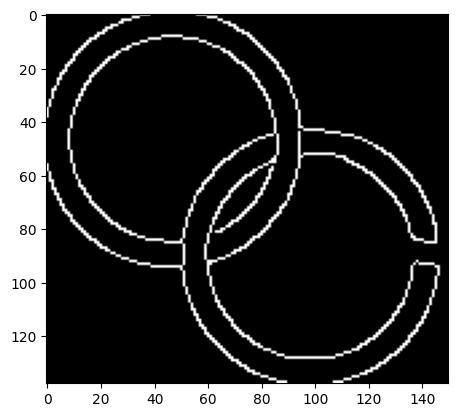

In [22]:
plt.imshow(E, cmap='gray')

In [39]:
best_cr, best_cc, best_d = RANSACCircle(E)

In [40]:
best_cr, best_cc, best_d

(47.00189753320683, 46.616698292220114, 47.70068817588034)

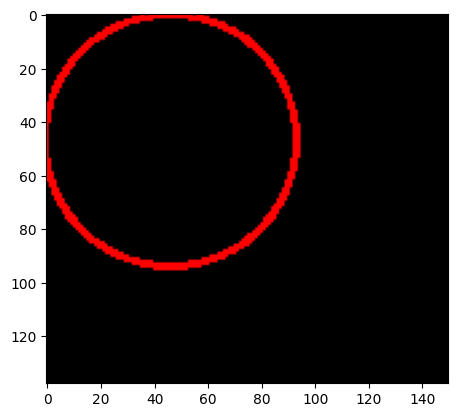

In [41]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])